# 1. Data Import
#### Importing the data from csv files and using the library function ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from matplotlib import pyplot
%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_columns",50)

In [2]:
df = pd.read_csv('/Users/garyhsu/group-project-group-r-master/Data/new_dataframe.csv', encoding='UTF-8')
df.head()

,district,subject of transaction,total land transfer area square meters,urban land use zoning,non-urban land Use zoning,non-urban land use planning,transaction year and month,number of transaction pens,transfer level,total floors,building type,main use,main building material,year and month of completion of construction,total area of building transfer square meters,construction status-room,construction status-hall,construction status-bathroom,construction status-compartment,with or without management organization,total price,unit price per square meter,parking category,Car displacement to total area square meters,total parking price,numbers
0,Banqiao,House and land (land + building),13.88,Living,NaN,NaN,1080424,ground2 house1 park0,4,4.0,apartment,living,reinforced concrete construction,690731.0,42.08,3,2,1,Yes,No,2500000,59411.0,NaN,0.0,0,RPXSMLOLPHOFFAF07CA
1,Banqiao,House and land (land + building),31.75,Living,NaN,NaN,1080522,ground3 house1 park0,1,4.0,apartment,living,reinforced concrete construction,640610.0,91.14,0,0,0,No,No,16800000,184332.0,NaN,0.0,0,RPUOMLQLPHOFFAF56CA
2,Banqiao,House and land (land + building),26.00,Living,NaN,NaN,1080528,ground2 house1 park0,3,4.0,apartment,living,reinforced concrete construction,660615.0,63.54,3,2,1,Yes,No,7000000,110167.0,NaN,0.0,0,RPORMLLJQHOFFAF28CA
3,Xinzhuang,House and land (land + building),41.66,Living,NaN,NaN,1080418,ground4 house1 park0,2,4.0,apartment,living,reinforced concrete construction,670518.0,92.29,3,2,1,Yes,No,6250000,67721.0,NaN,0.0,0,RPXRMLNLPHOFFBF96CA
4,Xinzhuang,House and land (land + building),19.90,Living,NaN,NaN,1080625,ground1 house1 park0,3,4.0,apartment,living,reinforced concrete construction,631018.0,60.56,2,1,1,Yes,No,6000000,99075.0,NaN,0.0,0,RPRSMLNKQHOFFBF09CA


# 2. Data Preparation

#### 2.1  ####
Drop the transactions for only to have 'Land' and 'car parking space'

In [3]:
df=df[(df['subject of transaction']!='Land')&(df['subject of transaction']!='car parking space')].reset_index(drop=True)

#### 2.2 #### 
Turn the price (dollar) unit to Million by dividing the total price by 1000000. It will be useful for us while exploring data.

In [4]:
df.loc[:,'total price(millon)'] = df.loc[:,'total price']/1000000

#### 2.3 #### 
Create three new columns. 'transcation_year', 'completion_year', and 'house_ages'

In [5]:
from datetime import datetime
now = datetime.now()

#### 2.4.1
Create A New Column named ' transaction_year '

In [6]:
for i in range(len(df)):
    df.loc[i,'transcation_year'] = round(df.loc[i,'transaction year and month']/10000)+1911

#### 2.4.2
Create A New Column named ' completation_year '

In [7]:
for i in range(len(df)):
    df.loc[i,'completion_year'] = round(df.loc[i,'year and month of completion of construction']/10000)+1911

#### 2.4.3 ####
Create A New Column named ' house_ages '

In [8]:
 for i in range(len(df)):
    df.loc[i,'house_ages'] = now.year - 1911 - round(df.loc[i,'year and month of completion of construction']/10000)

Visualizing the new dataframe after adding new columns

In [9]:
df.sample(1)

,district,subject of transaction,total land transfer area square meters,urban land use zoning,non-urban land Use zoning,non-urban land use planning,transaction year and month,number of transaction pens,transfer level,total floors,building type,main use,main building material,year and month of completion of construction,total area of building transfer square meters,construction status-room,construction status-hall,construction status-bathroom,construction status-compartment,with or without management organization,total price,unit price per square meter,parking category,Car displacement to total area square meters,total parking price,numbers,total price(millon),transcation_year,completion_year,house_ages
2571,Linkou,House and land (land + building) + parking space,9.9,Business,NaN,NaN,1080130,ground1 house1 park1,22,23.0,residential building,other,steel reinforced concrete construction,1080509.0,147.49,2,2,2,Yes,Yes,13800000,104666.0,parking area,34.75,2000000,RPTQMLRKPHOFFBF96EA,13.8,2019.0,2019.0,1.0


# 3.Data Exploring

#### 3.1 
The number of data in each district.

Text(0, 0.5, 'The number of transcation')

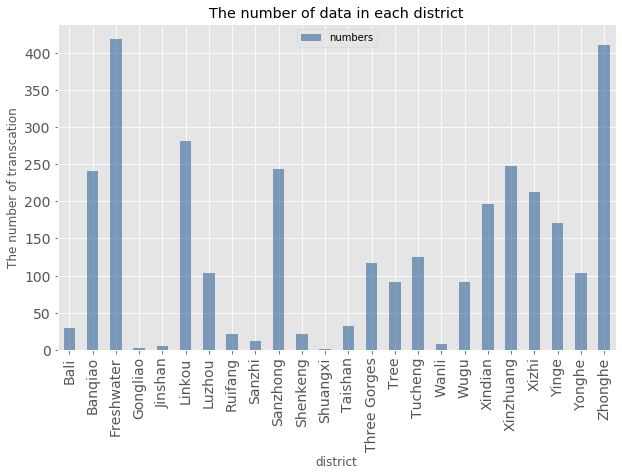

In [10]:
ax = df.groupby('district').count().plot(kind='bar',y='numbers',
                                         figsize=(10,6),fontsize=14,
                                         title='The number of data in each district',
                                         color=(0.2, 0.4, 0.6, 0.6))
ax.set_ylabel('The number of transcation')

We can know that Freshwater, Linkou, Sanzhong, Xinzhuang, and Zhonghe have the most number of transcation data.

#### 3.2 
##### Correaltion Analysis

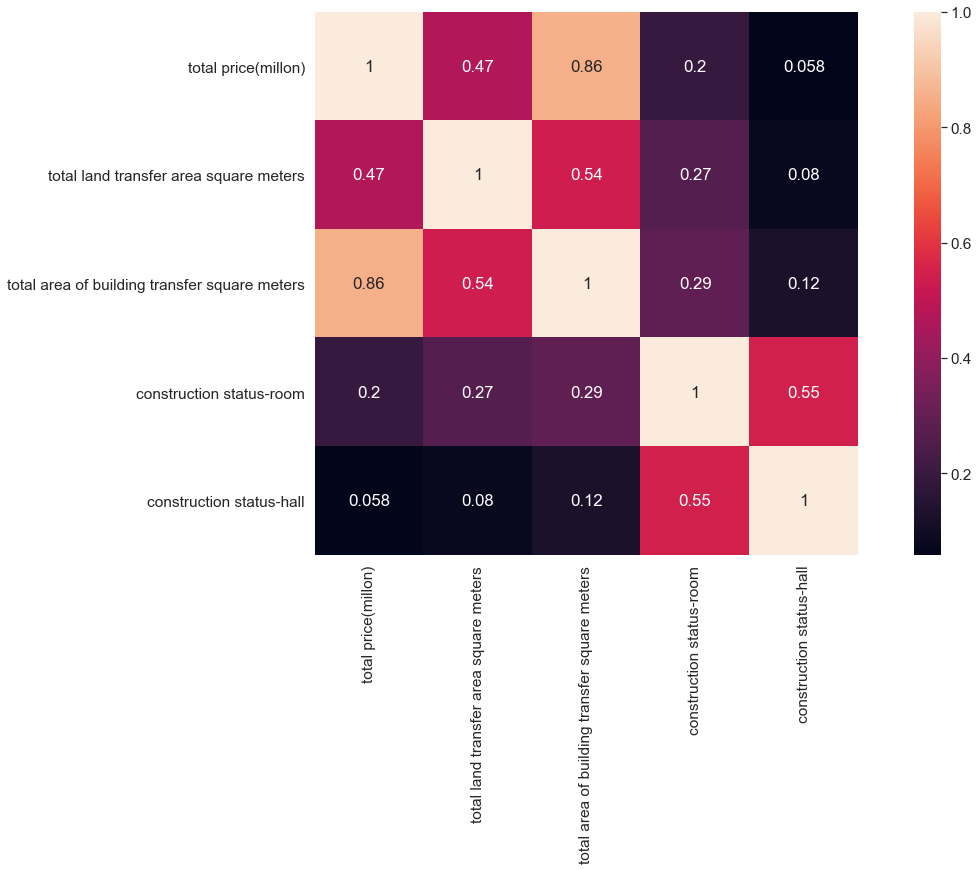

In [11]:
cor = df[['total price(millon)','total land transfer area square meters',
          'total area of building transfer square meters','construction status-room',
          'construction status-hall']].corr()
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(cor, square=True, annot=True)
plt.show()

Here, we can see that 'total land transfer area square meters', 'construction status hall', 'total area of building transfer square meters' have a high correlation with 'total price(million)' 

<Figure size 1152x720 with 0 Axes>

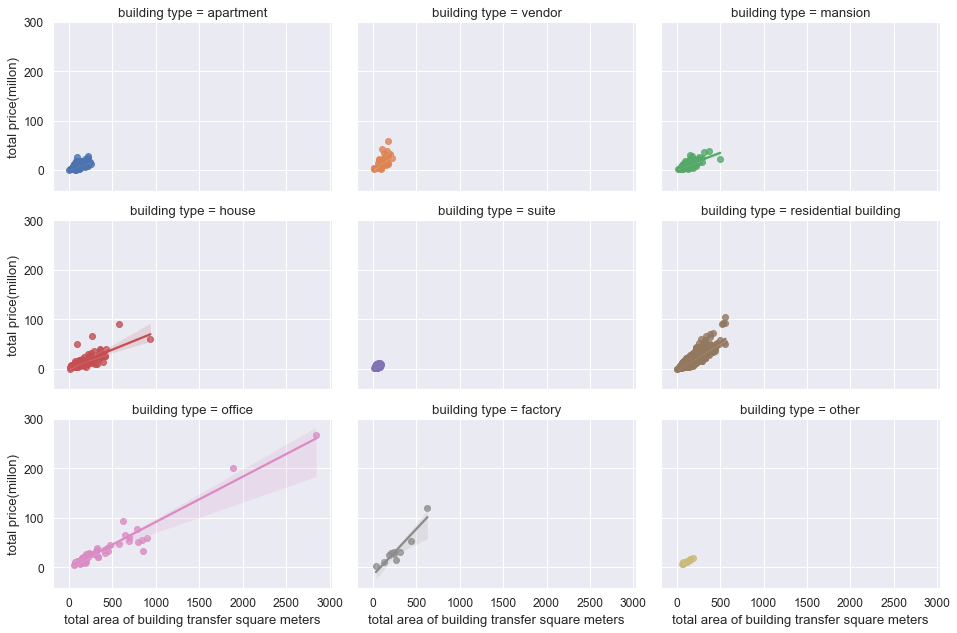

In [12]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.1)
g = sns.lmplot(x="total area of building transfer square meters", 
               y="total price(millon)", hue="building type", col="building type",
               data=df,col_wrap=3, height=3,aspect=1.5)

The higher square meters in a house, the higher price in transcation price.
In each building type, the correlation shows significant, but some of data the in residential building have too high prices.

#### 3.3 
##### Comparing each district 

We can know that Banqiao, Sanzhong, Yonghe, and Zhonghe have most high prices per square meter in median.

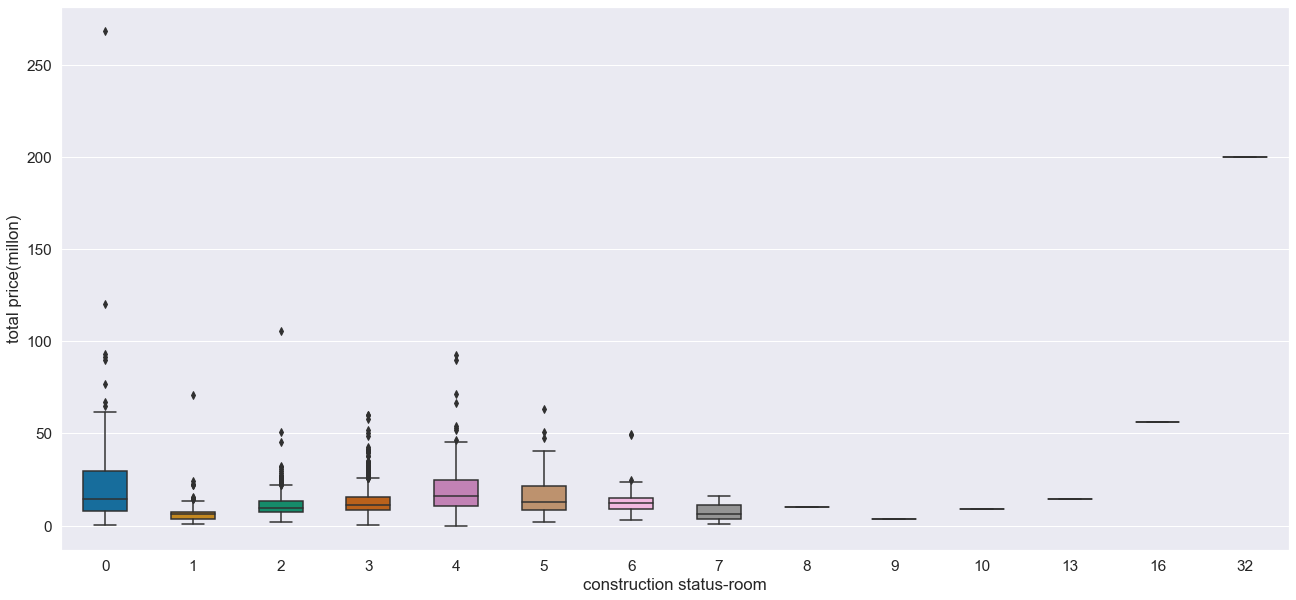

In [13]:
plt.figure(figsize=(22,10))
sns.set(font_scale=1.4)
bplot = sns.boxplot(y='total price(millon)', x='construction status-room', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

When the number of status-rooms is more than 2 and less than 6, the total price is high, but some of the data do not have room also have high price.

Text(0, 0.5, 'The number of transcation')

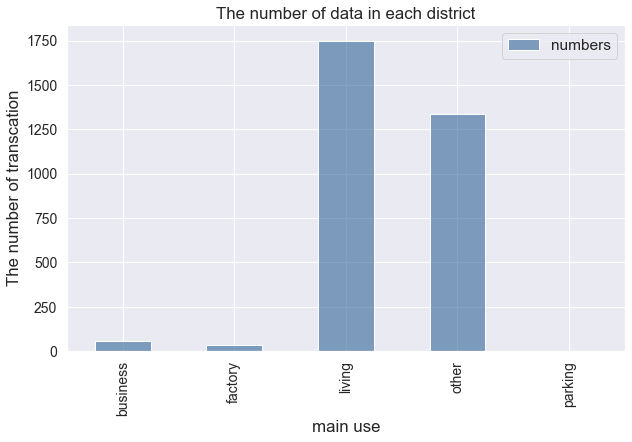

In [14]:
ax = df.groupby('main use').count().plot(kind='bar',
                                         y='numbers',figsize=(10,6),fontsize=14,
                                         title='The number of data in each district'
                                         ,color=(0.2, 0.4, 0.6, 0.6))
ax.set_ylabel('The number of transcation')

Most of the transcation in main use is living, but we do not know what is the information of  'other'.

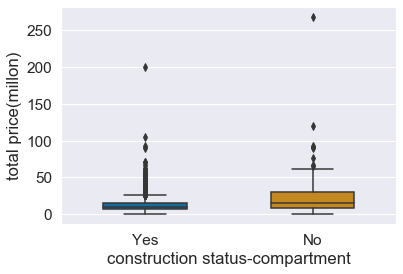

In [15]:
sns.set(font_scale=1.4)
bplot = sns.boxplot(y='total price(millon)', x='construction status-compartment', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

In the construction status-compartment, we can see that the 'No' in this variables has the higher price in Q3 and also has outliers with higher values.

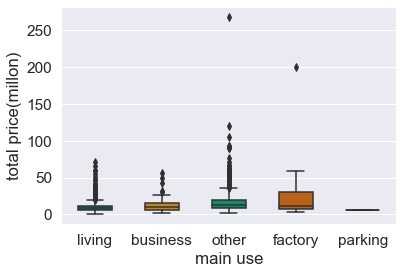

In [16]:
sns.set(font_scale=1.4)
bplot = sns.boxplot(y='total price(millon)', x='main use', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

The main use of factory has the highest price in Q3 with "other" uses having the most outliers.

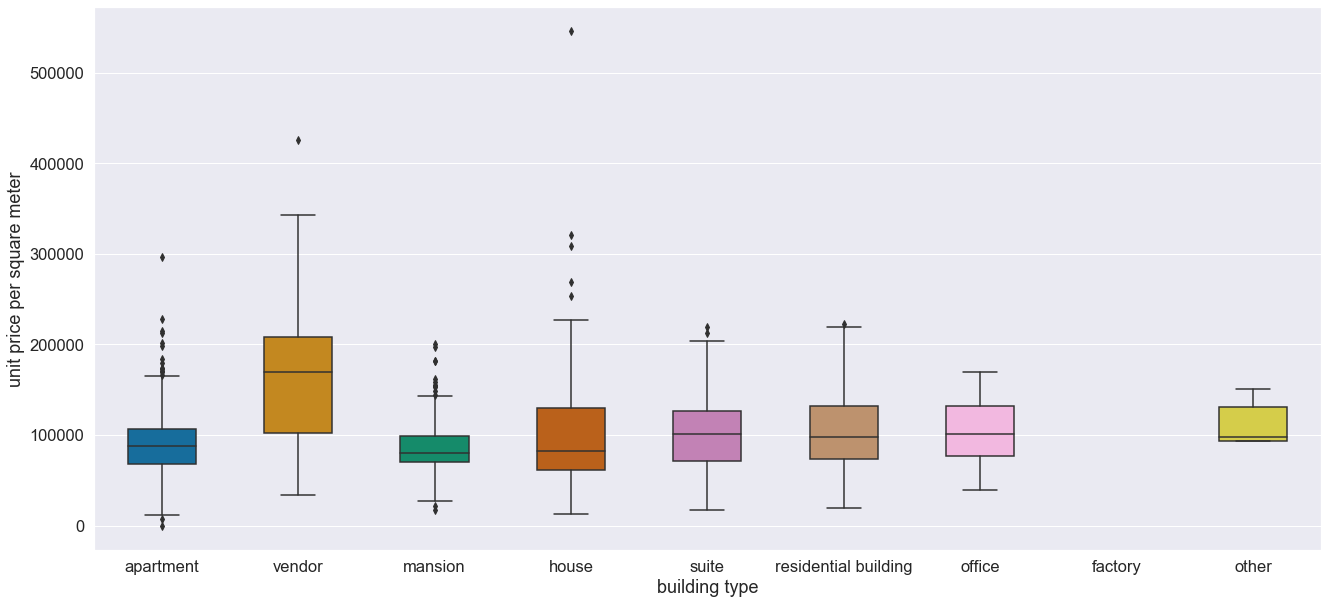

In [17]:
plt.figure(figsize=(22,10))
sns.set(font_scale=1.5)
bplot = sns.boxplot(y='unit price per square meter', x='building type', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# 4.Feature engineering

## Overlook all columns at first.

checking if there's a Null values i the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   district                                       3186 non-null   object 
 1   subject of transaction                         3186 non-null   object 
 2   total land transfer area square meters         3186 non-null   float64
 3   urban land use zoning                          3042 non-null   object 
 4   non-urban land Use zoning                      142 non-null    object 
 5   non-urban land use planning                    142 non-null    object 
 6   transaction year and month                     3186 non-null   int64  
 7   number of transaction pens                     3186 non-null   object 
 8   transfer level                                 3184 non-null   object 
 9   total floors                                   3183 

#### 4.1

Divid the number of transaction pens into three new columns.
To know the number of ground, house, and parking space.

In [19]:
df['ground']=df['number of transaction pens'].str[6].astype(int)
df['park']=df['number of transaction pens'].str[-1].astype(int)
df['house']=df['number of transaction pens'].str[13:]
df['house']=df['house'].str.replace('park0','')
df['house']=df['house'].str.replace('park4','')
df['house']=df['house'].str.replace('park1','')
df['house']=df['house'].str.replace('park2','')
df['house']=df['house'].str.replace('park3','')
df['house']=df['house'].str.replace('park5','')
df['house']=df['house'].str.replace('park9','')
df['house']=df['house'].str.replace('park6','')
df['house']=df['house'].str.replace('e','')
df['house']=df['house'].astype(float)

#### 4.2

Show the number of levels in each transaction.  

In [20]:
df['number of levels']=df['transfer level'].str.len()
df['number of levels']=df['number of levels'].astype(float)
df['number of levels']=df['number of levels'].fillna(0)

From 3.3, we can know that the price of house without construction status-compartment is higher than the house with construction status-compartment,
so we change this category variable from 'No' to 1 and 'Yes' to 0.  

In [21]:
# Replacing the strings for 'No' into '1' and 'Yes' into '0'
df['construction status-compartment']=df['construction status-compartment'].str.replace('No','1')
df['construction status-compartment']=df['construction status-compartment'].str.replace('Yes','0')
df['construction status-compartment']=df['construction status-compartment'].astype(float)

# One hot encoding

In [22]:
one_hot = pd.get_dummies(df['building type'])
X1=pd.DataFrame(one_hot['vendor'])
df = df.drop('building type',axis = 1)
df = df.join(X1)
df['vendor']=df['vendor'].astype(int)
df=df.rename(columns={"vendor": "building type(vendor)"})

In [23]:
one_hot = pd.get_dummies(df['main use'])
X1=pd.DataFrame(one_hot['other'])
df = df.drop('main use',axis = 1)
df = df.join(X1)
df['other']=df['other'].astype(int)
df=df.rename(columns={"other": "main use(other)"})

# Split the data ( training:80%, testing=20% )

In [24]:
X = df[['total land transfer area square meters','building type(vendor)','main use(other)',
        'total area of building transfer square meters','construction status-room',
        'ground','park','house','number of levels','construction status-compartment']]
y = df[['total price']]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size = 0.2)
print(X_train.head())

      total land transfer area square meters  building type(vendor)  \
533                                    34.06                      0   
2086                                    2.28                      1   
2606                                    8.71                      0   
3056                                   19.79                      0   
2506                                    8.19                      0   

      main use(other)  total area of building transfer square meters  \
533                 0                                          96.59   
2086                1                                          17.42   
2606                1                                         134.08   
3056                1                                         149.34   
2506                1                                         106.99   

      construction status-room  ground  park  house  number of levels  \
533                          2       1     0    1.0               1

In [25]:
#checking again for Null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   total land transfer area square meters         3186 non-null   float64
 1   building type(vendor)                          3186 non-null   int64  
 2   main use(other)                                3186 non-null   int64  
 3   total area of building transfer square meters  3186 non-null   float64
 4   construction status-room                       3186 non-null   int64  
 5   ground                                         3186 non-null   int64  
 6   park                                           3186 non-null   int64  
 7   house                                          3186 non-null   float64
 8   number of levels                               3186 non-null   float64
 9   construction status-compartment                3186 

# Standardization

In [26]:
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

# Regression Model (1)-Linear Regression

In [27]:
for clf in [linear_model.LinearRegression(),
            RandomForestRegressor(),
            xgb.XGBRegressor(silent=True)]:
    clf=clf
    clf.fit(X_train_normalized, y_train.values.ravel())
    print("--------------------------------------------------------------------------------")
    print(clf, end='\n')
    print("training dataset")
    y_train_pred = clf.predict(X_train_normalized)
    print("MSE: ", mean_squared_error(y_train, y_train_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("R^2: ", r2_score(y_train, y_train_pred))
    print("MAE: ", mean_absolute_error(y_train, y_train_pred))
    print("--------------------------------------------------------------------------------")
    print("testing dataset")
    y_test_pred = clf.predict(X_test_normalized)
    print("MSE: ", mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R^2: ", r2_score(y_test, y_test_pred))
    print("MAE: ", mean_absolute_error(y_test, y_test_pred))

--------------------------------------------------------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
training dataset
MSE:  29748732723754.855
RMSE:  5454239.885057757
R^2:  0.7689821611075702
MAE:  3634097.822716385
--------------------------------------------------------------------------------
testing dataset
MSE:  26062193549807.625
RMSE:  5105114.450216334
R^2:  0.6741845284914256
MAE:  3413430.933068108
--------------------------------------------------------------------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                   

We can see from the output values that the Random Forest model performs the best in these three models.

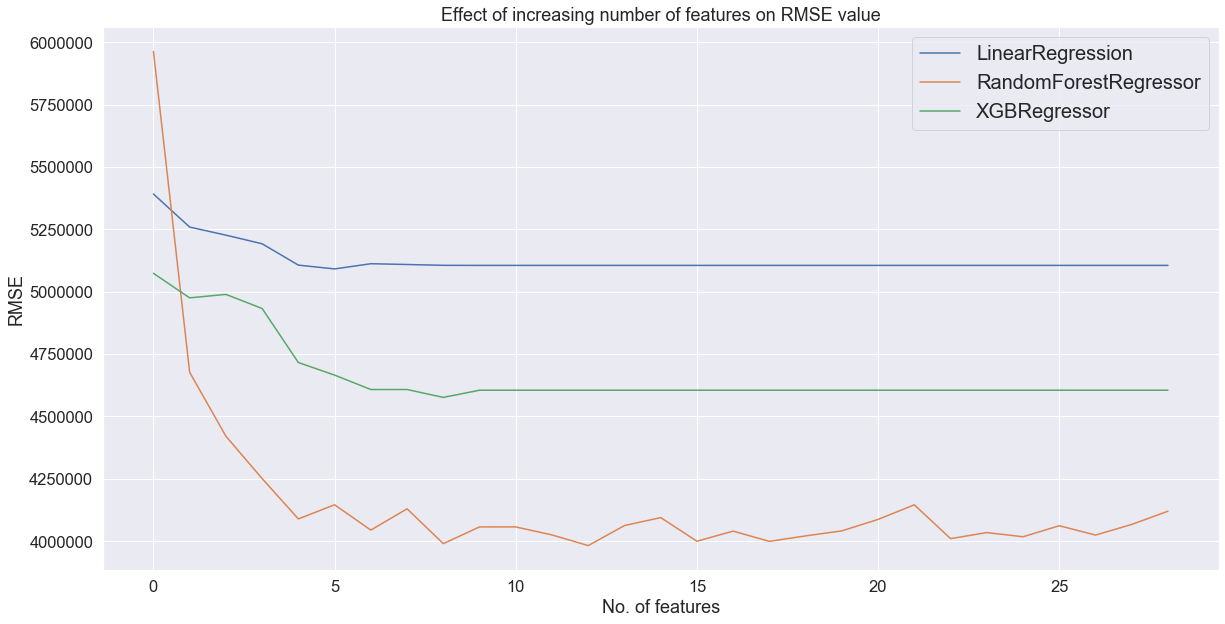

In [28]:
RMSE_list = []
for i in range(1, 30):
    model = linear_model.LinearRegression()
    selector = RFE(model, i)
    selector.fit(X_train_normalized, y_train.values.ravel())
    y_predicted_test = selector.predict(X_test_normalized)
    RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))

RMSE_list2 = []
for i in range(1, 30):
    model = RandomForestRegressor()
    selector = RFE(model, i)
    selector.fit(X_train_normalized, y_train.values.ravel())
    y_predicted_test = selector.predict(X_test_normalized)
    RMSE_list2.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))
        
RMSE_list3 = []
for i in range(1, 30):
    model = xgb.XGBRegressor(silent=True)
    selector = RFE(model, i)
    selector.fit(X_train_normalized, y_train.values.ravel())
    y_predicted_test = selector.predict(X_test_normalized)
    RMSE_list3.append(np.sqrt(mean_squared_error(y_test, y_predicted_test)))
        
        
        
RMSE_df = pd.DataFrame(RMSE_list, columns=['RMSE'])
RMSE_df2 = pd.DataFrame(RMSE_list2, columns=['RMSE'])
RMSE_df3 = pd.DataFrame(RMSE_list3, columns=['RMSE'])



plt.figure(figsize=(20,10))
pyplot.plot(RMSE_df['RMSE'])
pyplot.plot(RMSE_df2['RMSE'])
pyplot.plot(RMSE_df3['RMSE'])
plt.legend(['LinearRegression', 'RandomForestRegressor', 'XGBRegressor'], prop={'size': 20})
plt.title('Effect of increasing number of features on RMSE value')
plt.xlabel('No. of features')
plt.ylabel('RMSE')
plt.show()

Based on these graph, the Linear model and XGBoost model finally stay to a constant, but in Random Forest model, the RMSE shows a continuous fluctuation and manages to have a low RMSE value than both Linear Regression and XGB Regression model.

In [29]:
print(__doc__)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from '/Users/garyhsu/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

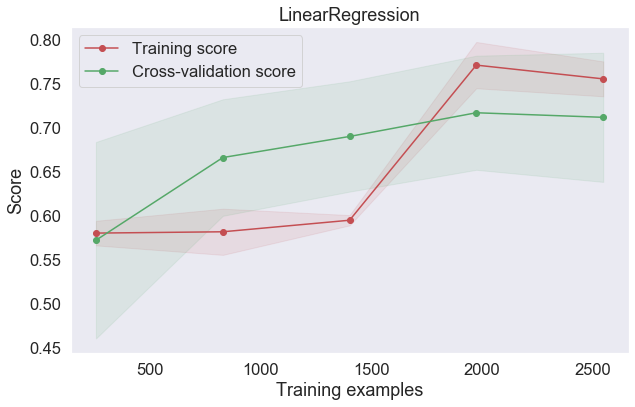

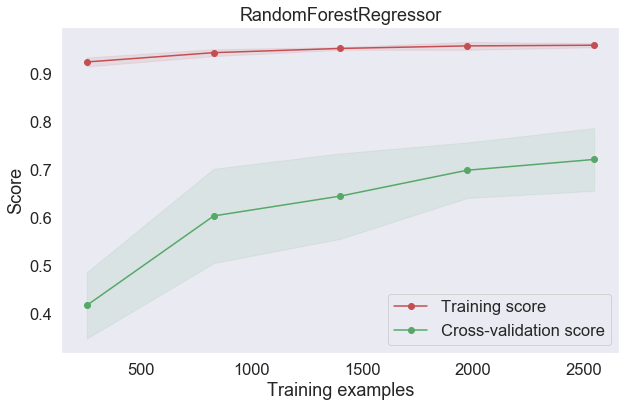

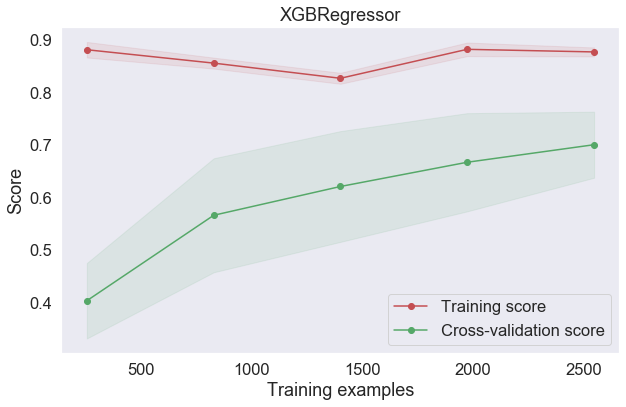

In [30]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
estimator = linear_model.LinearRegression()
plot_learning_curve(estimator, "LinearRegression",X, y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))
#-----------------------------------------------------------------------------------

estimator = RandomForestRegressor()
plot_learning_curve(estimator, "RandomForestRegressor",X, y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))

#-----------------------------------------------------------------------------------

estimator = xgb.XGBRegressor(silent=True)
plot_learning_curve(estimator, "XGBRegressor",X, y.values.ravel(), cv=cv , train_sizes=np.linspace(0.1, 1.0, 5))


In linear regression model, we can know that if Training example is larger than 2000 won't have overfiiting issue because the training score is larger than Cross-validation score.

In other models, they do not have overfitting issue because the training score always larger than the Cross-validation score.

# Conclusion

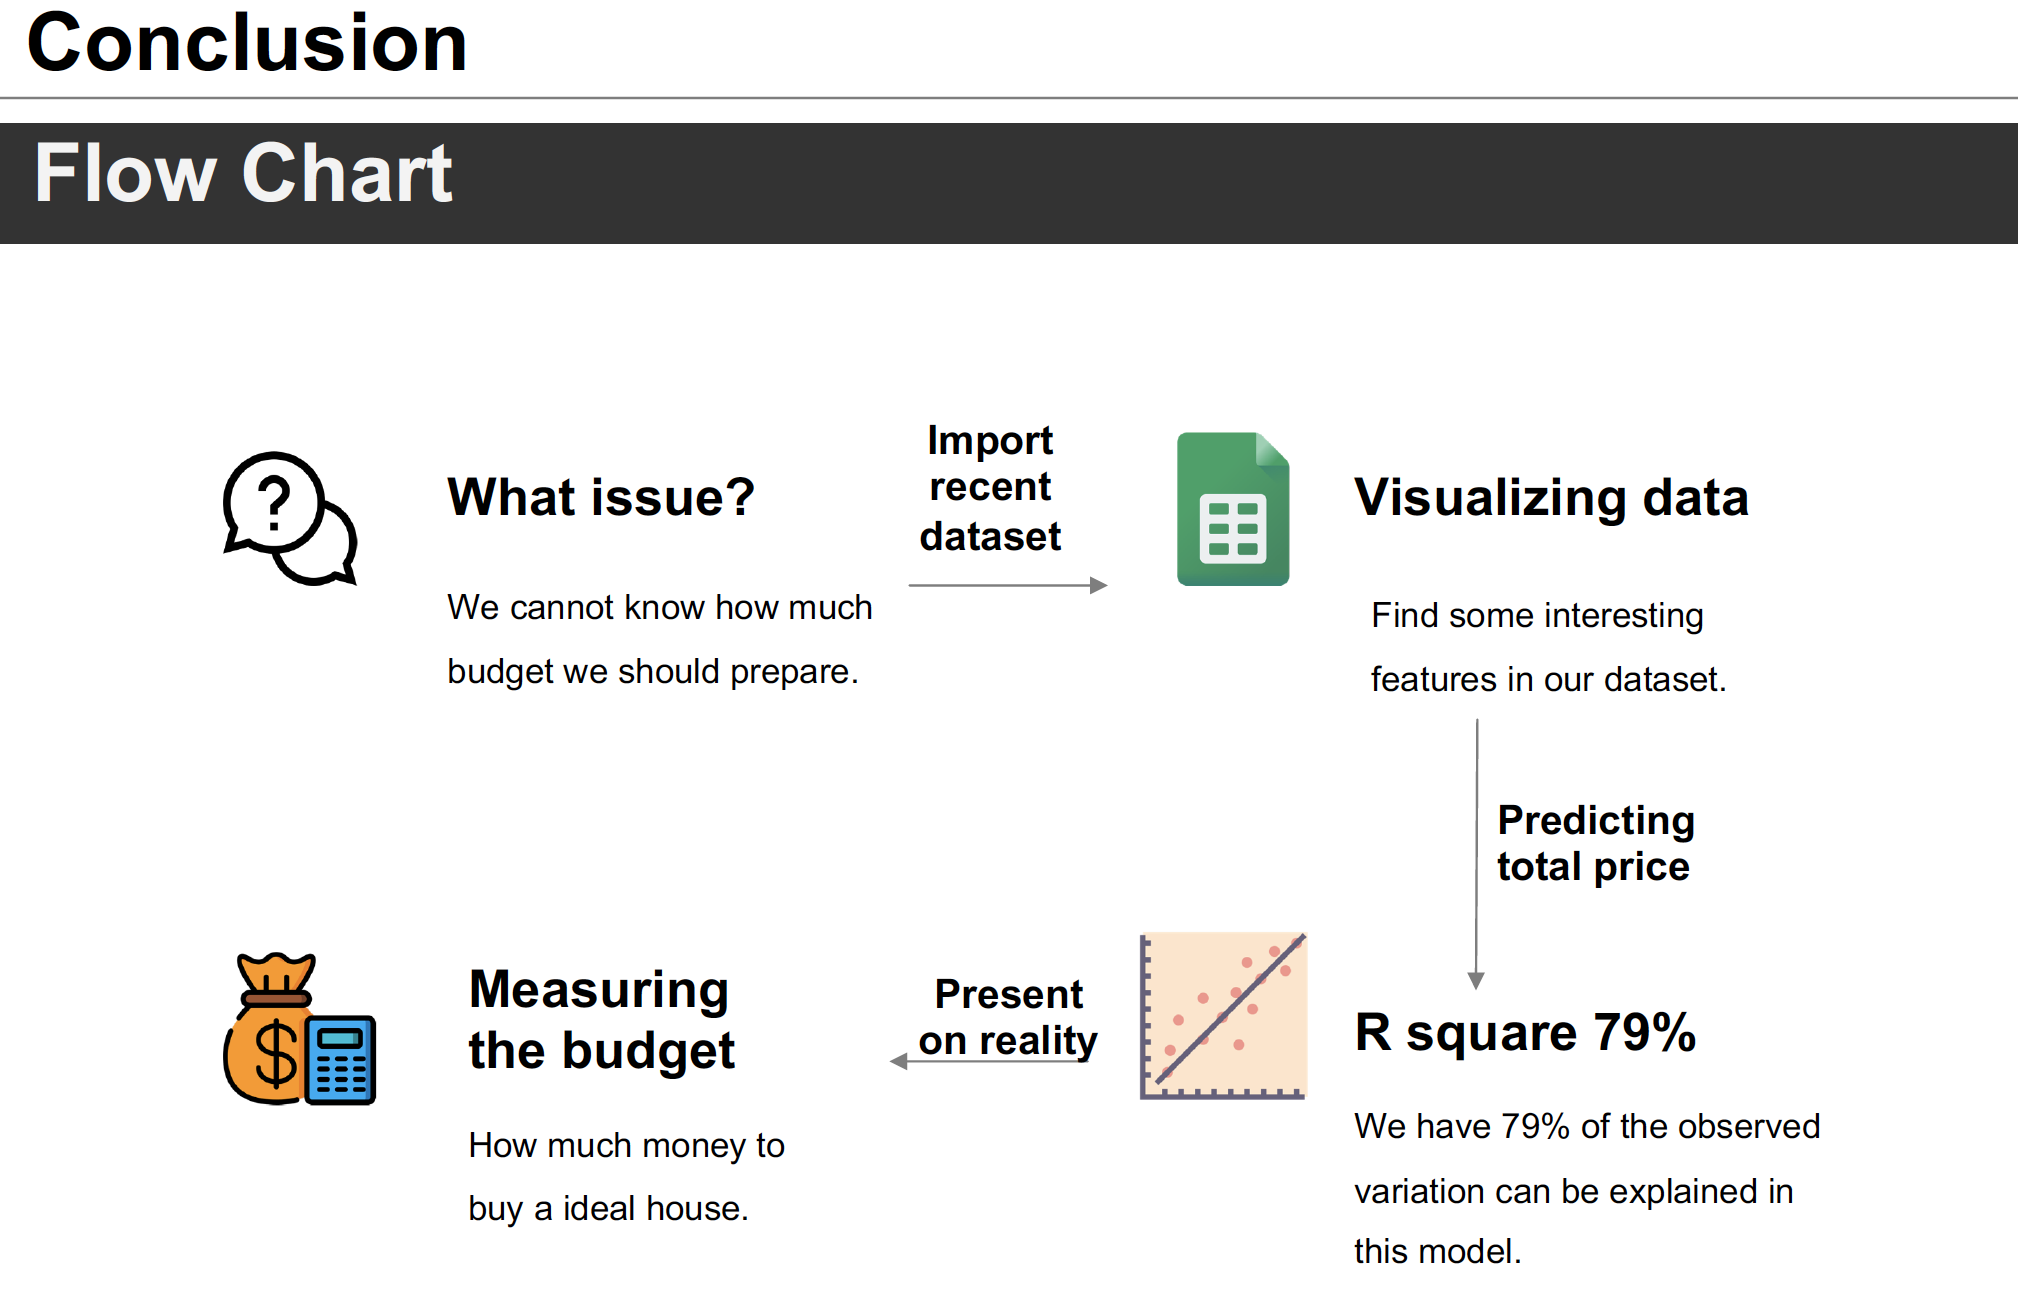

In [31]:
from IPython.display import Image
Image(filename='/Users/garyhsu/group-project-group-r-master/ppt/conclusion.png',
      width=800, height=400)

First, the issue we want to deal with is that people have less knowledge or idea about how much price that they can but a ideal house. And we input the recent dataset in to our computer to calculate the price. Visualizing the data and finding some interseting trend in here. And then, we try to predict a useful price from these colums.  We get the R square is 79 percent, it shows We have 79% of the observed variation can be explained in this model.

Finally, we present the result on reality. When someone want to buy a ideal house, he or she can use the model and these attributes to measure a value that he or she should prepare.